## Cropping parts of image

In [102]:
"""Setup cell."""
from PIL import Image
import pytesseract
import numpy as np
pytesseract

<module 'pytesseract' from 'c:\\users\\grucu\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\pytesseract\\__init__.py'>

In [47]:
def binarize_img(img, treshhold_value):
    img = img.convert("L") # converting to greyscale mode
    
    width, height = img.size
    
    for x_axis in range(width):
        for y_axis in range(height):
            if img.getpixel((x_axis, y_axis)) < treshhold_value:
                img.putpixel((x_axis, y_axis), 0)
            else:
                img.putpixel((x_axis, y_axis), 255)
    
    return img

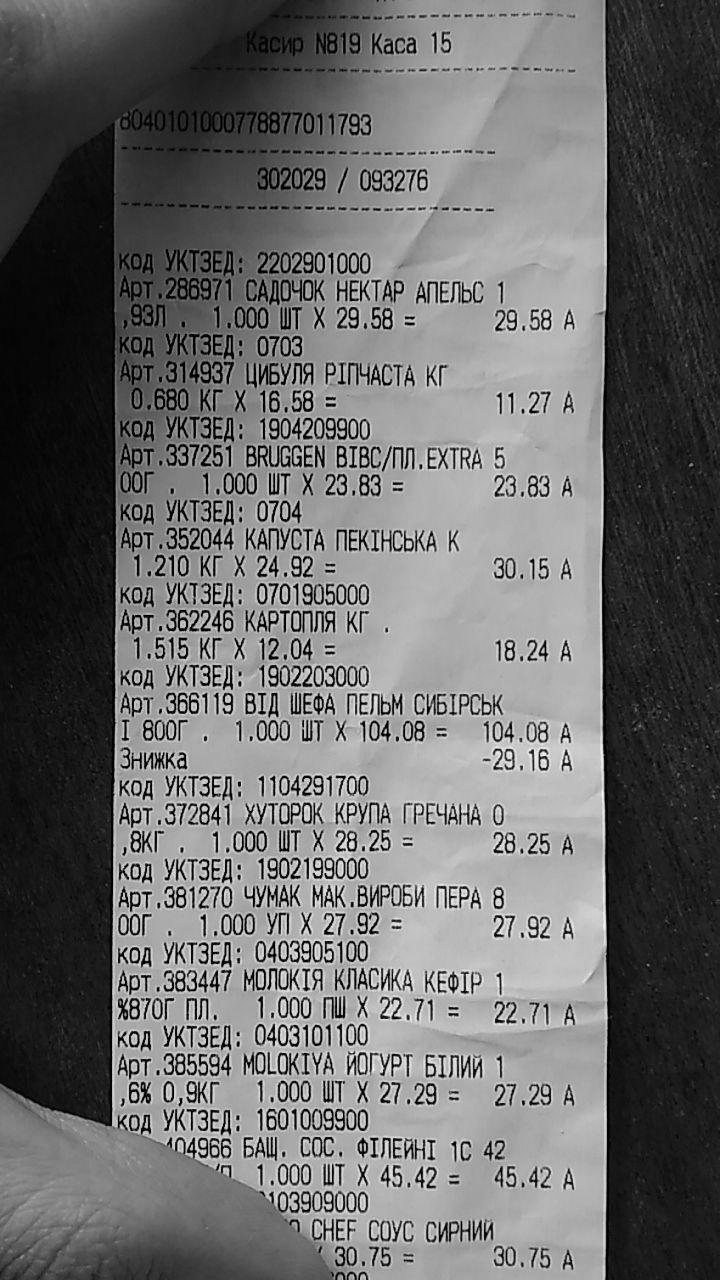

In [5]:
bill_img = Image.open("Test-Samples/metro/metro_sample.jpg")
grey_bill_img = bill_img.convert("L")

display(grey_bill_img)

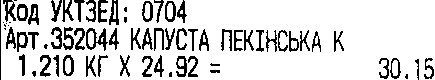

КОД УКТЗЕД: ОГО4
рт. 362044. КАПУСТА ПЕКІНСЬКА К
1,210 КР Х 24,92 - 30.18


In [94]:
grey_cropped = grey_bill_img.crop((115, 500, 550, 580))

grey_cropped = binarize_img(grey_cropped, 111)
display(grey_cropped)


cropped_grey_text = pytesseract.image_to_string(grey_cropped, lang="ukr")
print(cropped_grey_text)

In [122]:
bill_img = Image.open("Test-Samples/metro/metro_sample.jpg")
bill_img = bill_img.crop((115, 0, 600, 1280))

bill_img = binarize_img(bill_img, 112)


print(pytesseract.image_to_string(bill_img, lang="ukr"))

лу ВС РИ
ИБУЛЯ РІПНАСТА КГ

ПОТА
ЗЕД: 1904208800
ВОТЕЗЗГОБІ ВАЦОБЕМ ВІВСУПЛ,ЕХТВА 5
. Л.000 ШТ Х 23,83 з 23.83 4
Код УКТЗЕД: ОТО4
Арт 352044. КАПУСТА. ПЕКІНСЬКА К
1,210 КГ Х 24.92 - 305 А
код УКТЗЕД: О701905000
Арт. 362246 КАРТОПЛЯ КГ .
1,515 КГОХ 12,04 з 18.4 А
код УКТЗЕД: 1902203000
рт. 388119 ВІД ШЕФА ПЕЛЬМ СИБІРСЬК
І800ГО. 1.00 ШИХ 104.08 «8 104.08 А
Знижка -2916 4
код УКТЗЕД: 1104291700
Арт.ЗТ284Ї ХУТОРОК КРУПА ГРЕЧАНА 0
КГ, 1,000 ШІ Х 28.25 с 28.95 А
код УКТЗЕД: 1902198000
Арт. 381270 ЧУМАК МАК.ВИРОБИ ПЕРА 8
ОГО. 1.000 УП Х 27.92 с ТА
код УКТЗЕД: О403805100
Арт.383447 НОЛОКТЯ КЛАСИКА КЕФІР !
Я8ТОГ ПЛ. | 1.00 ШХ 22,71 « 29.71 4
код УКТЗЕД: О4О3101100
Арт.385594 МОЇОКТУА ЙОГУРТ БІЛИЙ 1
я 0,9КГО Р.О Х 21.29 з Т.А
КОД УКТЗЕД: 1601009900
дова БАЦ. СОС. ФІЛЕЙНІ 13 42
000 ШІ Х 4542 с 45424
03809000
СНЕРОСОУС СИРНИЙ
. 30.75 А


Tuning
DEFFERENCE 180
Tuning
DEFFERENCE 9
Tuning
DEFFERENCE 15
Tuning
DEFFERENCE 0
************************************************************
************************************************************
************************************************************


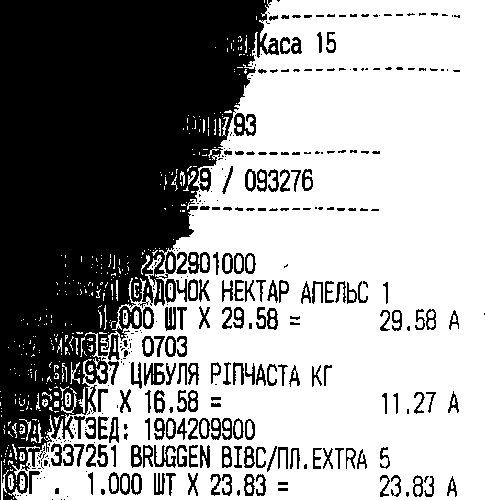

ії ЦИБУЛЯ РІПЧАСТА КГ
КГОХ 16,58 з ПОТА
ТЗЕД: 1904209800

931251 ВАЦАБЕМ ВІВСПЛ.ЕХТНА 5

. 1,000 ШТ Х 23,83 с 73,83 А


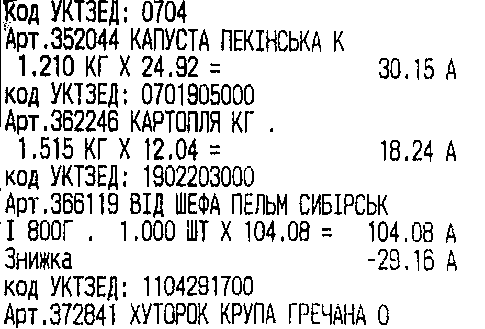

КОД УКТЗЕД: 0104
рт. 352044 КАПУСТА ПЕКІНСЬКА К

1,210 КГ Х 24.92 - 305 А
код УКТЗЕД: О701905000
Арт. 362246 КАРТОПЛЯ КГ .

1,515 КГОХ 12,04 з 18.24 4
код УКТЗЕД: 1902203000

рт. 388119 ВІД ШЕФА ПЕЛЬМ СИБІРСЬК
І800ГО. 1.00 ШИХ 104.08 «8 104.08 А
Знижка -2916 4
код УКТЗЕД: 1104291700
Арт.377841 ХУТОРОК КРУПА ГРЕЧАНА 0


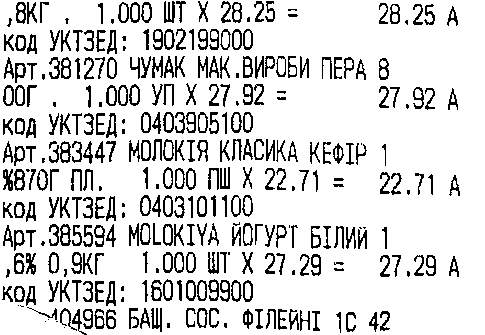

:9КГО, 1.000 ШТ Х 20.25 « 28.26 А
код УКТЗЕД: 1902198000
Арт. 381270 ЧУМАК МАК ВИРОБИ ПЕРА 8
ОГО, 1.000 УП Х 27.92 « 21.99 А
код УКТЗЕД: 0403805100
Арт. 383447 МОЛОКТЯ КЛАСИКА КЕФІР 1
ХВТОГОПЛ, 1.00 ШХ 22714 ТА
код УКТЗЕД: О4О3101100
Арт.385594 МОЦОКТУА МОГУРТ БІЛИЙ 1

КУ О,9КГО РОСТ Х 27.9 а ТА
КОД УКТЗБА: 1601008900

См04986 БА. СОС. ФІЛЕЙНІ 10 42


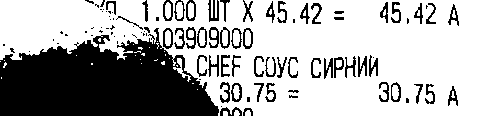

000 ШІ Х 45,42 « 45,40 4
03909000

СНЕК СОУС СИРНИЙ
90.75 є ЗОБА


In [127]:
img_size_to_parts = {
    range(400, 800): 2,
    range(800, 1300): 4,
    range(1300, 2000): 8,
    range(2000, 4000): 12
}


def get_percentage_of_white(np_arr):
    white_pixels_amount = np.count_nonzero(np_arr)
    percentage = int(white_pixels_amount / np_arr.shape[0] * 100)
    return percentage


def get_croping_part_amount(img_height):
    for key_range in img_size_to_parts:
        if img_height in key_range:
            return img_size_to_parts[key_range]

        
def get_last_line_white_percentage(img):
    last_line = img.crop((0, img.size[1]-3, img.size[0], img.size[1]))
    
    white_percentage = get_percentage_of_white(np.array(last_line.getdata()))
    return white_percentage
        
def get_tuned_cropped_img(original_img, cropped_coords, cropped_img):
    print("Tuning")
    
    white_percentage = get_last_line_white_percentage(cropped_img)
    
    x1, y1, x2, y2 = cropped_coords
    
    difference = 0
    
    while white_percentage <= 95:
        if y2 >= original_img.size[1]:
            break
        y2 += 3
        difference += 3
        cropped_img = original_img.crop((x1, y1, x2, y2))
        white_percentage = get_last_line_white_percentage(cropped_img)
    
    return cropped_img, difference
        
        

        
def crop_image(img, cropping_rectangle:tuple):
    img_width, img_height = img.size
    x1, y1, x2, y2 = cropping_rectangle
    
    if x2 > img_width:
        x2 = img_width
    if y2 > img_height:
        y2 = img_height
        
    cropped_img = img.crop((x1, y1, x2, y2))
    
    return get_tuned_cropped_img(img, (x1, y1, x2, y2), cropped_img)


def slice_image_to_parts(image):
    cropped_parts = []
    width, height = image.size
    crop_parts_amount = get_croping_part_amount(height)
    average_block_height = int(height / crop_parts_amount)
    
    y_start_line = 0
    y_end_line = average_block_height
    
    for _ in range(crop_parts_amount):
        cropped_part_img, difference = crop_image(image, (0, y_start_line, width, y_end_line))
        
        print("DEFFERENCE", difference)
    
        cropped_parts.append(cropped_part_img)
        y_start_line = y_end_line + difference
        y_end_line = y_end_line + average_block_height + difference
        
    return cropped_parts


parts = slice_image_to_parts(bill_img)

print("***" * 20)
print("***" * 20)
print("***" * 20)

for part in parts:
    display(part)
    print(pytesseract.image_to_string(part, lang="ukr"))

In [ ]:
def get_percentage_of_black(np_arr):
    white_pixels_amount = np.count_nonzero(pixel_arr)
    percentage = int(white_pixels_amount / np_arr.shape[0] * 100)
    return percentage

px3_line = grey_cropped.crop((0, 24, grey_cropped.size[0], 27))
print(px3_line.size[0], px3_line.size[1])
display(px3_line)

pixel_arr = np.array(px3_line.getdata())
print(np.count_nonzero(pixel_arr))
print("*")

print(list(px3_line.getdata()))

print(get_percentage_of_black(np.array(px3_line.getdata())))